# `Description du challenge`

## Informations sur l'ensemble de données

Cet ensemble de données contient des informations sur les paiements par défaut, les facteurs démographiques, les données de crédit, l'historique des paiements et les relevés de factures des clients de cartes de crédit à Taïwan d'avril 2005 à septembre 2005.

## Contenant

Il y a 19 variables:


| Name | Description |
| -----| ----- | 
| ID |  ID of each client |
| LIMIT_BAL |  Amount of given credit in NT dollars (includes individual and family/supplementary credit |
| SEX |  Gender (1=male, 2=female) |
| EDUCATION |  (1=graduate school, 2=university, 3=high school, 4=others) |
| MARRIAGE |  Marital status (1=married, 2=single, 3=others) |
| AGE |  Age in years |
| BILL_AMT1 |  Amount of bill statement in September, 2005 (NT dollar) |
| BILL_AMT2 |  Amount of bill statement in August, 2005 (NT dollar) |
| BILL_AMT3 |  Amount of bill statement in July, 2005 (NT dollar) |
| BILL_AMT4 |  Amount of bill statement in June, 2005 (NT dollar) |
| BILL_AMT5 |  Amount of bill statement in May, 2005 (NT dollar) |
| BILL_AMT6 |  Amount of bill statement in April, 2005 (NT dollar) |
| PAY_AMT1 |  Amount of previous payment in September, 2005 (NT dollar) |
| PAY_AMT2 |  Amount of previous payment in August, 2005 (NT dollar) |
| PAY_AMT3 |  Amount of previous payment in July, 2005 (NT dollar) |
| PAY_AMT4 |  Amount of previous payment in June, 2005 (NT dollar) |
| PAY_AMT5 |  Amount of previous payment in May, 2005 (NT dollar) |
| PAY_AMT6 |  Amount of previous payment in April, 2005 (NT dollar) |
| default_payment_next_month |  Default payment (1=yes, 0=no) |

# Instructions

L'objectif de la première partie est de faire une analyse statistique sur l'ensemble des données pour bien comprendre notre dataset avant de prédire si le client sera par défaut le mois prochain dans la deuxième partie. 

> **Lets do this**

# Data Loading 

Importation de mon dataset `./data.csv`

In [2]:
# Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Pour l'imputation des donées - Explication dans la section dédiée
from impyute.imputation.cs import em

In [3]:
df =  pd.read_csv("..//Data//dataset.csv", index_col=0)
# we keep the colmuns names to use them after the imputation part
columns_names = df.columns.tolist()

# Preprocessing

**Etapes:**

* Observer les valeurs manquantes et comment on peut les imputer
* Calculer quelques statistiques descriptives pour mieux comprendre les données
* Finalement, séléctionner les variables les plus pertinentes pour la prédiction

### Imputer les valeurs manquantes

Tout d'abord, nous devons voir quelles colonnes ont des valeurs manquantes, puis après chercher la manière la plus fiable pour les imputer

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 18 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     29655 non-null float64
MARRIAGE                      29946 non-null float64
AGE                           27419 non-null float64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1                      30000 non-null float64
PAY_AMT2                      30000 non-null float64
PAY_AMT3                      30000 non-null float64
PAY_AMT4                      30000 non-null float64
PAY_AMT5                      27129 non-null float64
PAY_AMT6                      24526 non-null 

Comme nous pouvons le voir, nous avons **5 colonnes** qui ont des valeurs manquantes **(total < 3000)**. Il est donc utile de voir le **pourcentage** pour chaque colonne avant d'appliquer la procédure d'imputation, cela va m'aider à détecter rapidement les variables qui ont causé une mauvaise prédiction si j'ai des problèmes sur la précision de mes algorithmes de prédictions.

In [22]:
print(df.isna().mean())

LIMIT_BAL                     0.000000
SEX                           0.000000
EDUCATION                     0.011500
MARRIAGE                      0.001800
AGE                           0.086033
BILL_AMT1                     0.000000
BILL_AMT2                     0.000000
BILL_AMT3                     0.000000
BILL_AMT4                     0.000000
BILL_AMT5                     0.000000
BILL_AMT6                     0.000000
PAY_AMT1                      0.000000
PAY_AMT2                      0.000000
PAY_AMT3                      0.000000
PAY_AMT4                      0.000000
PAY_AMT5                      0.095700
PAY_AMT6                      0.182467
default_payment_next_month    0.000000
dtype: float64


Le pourcentage de valeurs manquantes est faible pour 4 colonnes sauf la colonne **PAY_AMT6** qui dépasse **10%**, cela peut influencer la prédiction

#### Solution proposée 

Il y a deux types d'imputation qui peuvent être effectués, le premier qui est **_imputation simple_**, il y a beaucoup de techniques pour l'exécuter (imputation par la moyenne, régression, KNN, etc.), j'ai essayé d'utiliser plusieurs **_imputation-multiple_** avec l'algorithme connu **"Expectation - Maximisation"** dont le principe est de générer pour chaque valeur plusieurs autres valeurs possibles (Expectation) et de prendre les valeurs qui ont le plus de chances d'être le bon choix (Maximisation)

_Remarque: l'imputation avec KNN ce sera aussi un bon choix, mais je choisis d'utiliser l'imputation-multiple_


In [4]:
df = em(df, loops=50)

C:\Users\Admin\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [5]:
# Ces lignes suivantes sont juste pour garder les noms des entêtes des colonnes après l'imputation
df.columns = columns_names
df.index = pd.RangeIndex(start=1, stop=30001, step=1)
df.index.rename(name="ID", inplace=True)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.000000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,19535.161089,1.0
2,120000.0,2.0,2.0,2.0,26.000000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.000000,1.0
3,90000.0,2.0,2.0,2.0,34.000000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.000000,0.0
4,50000.0,2.0,2.0,1.0,30.463951,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.000000,0.0
5,50000.0,1.0,2.0,1.0,57.000000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.000000,0.0


La phase d'imputation n'est pas encore terminée, dans ce cas il ne faut pas oublier de revenir à la description des données pour voir la modalité et le type de données de chacune des variables que nous avons imputées.

* Education -> (1 = études supérieures, 2 = université, 3 = lycée, 4 = autres), dtype = float64
* Mariage -> État matrimonial (1 = marié, 2 = célibataire, 3 = autres), dtype = float64
* Age -> Âge en années, dtype = float64
* PAY_AMT5 -> Montant du paiement précédent en avril 2005 (dollar NT), dtype = float64
* PAY_AMT6 -> Montant du paiement précédent en mai 2005 (dollar NT), dtype = float64

Nous pouvons voir directement le problème qui se posera après l'imputation, car le type de données de toutes ces variables est **float64**, donc après l'imputation, nous aurons des valeurs réelles pour la variable Education, Mariage et Âge qui n'acceptent que des valeurs entières (**int**).

In [25]:
df["MARRIAGE"].unique()

array([1.        , 2.        , 3.        , 1.4759129 , 1.54488241,
       0.70829543, 1.36743795, 0.97179317, 1.18280742, 1.31498744,
       1.36434965, 1.51143587, 1.12731488, 1.24436503, 1.32008827,
       0.77885315, 1.28084594, 1.11655502, 0.98017299, 1.27267079,
       0.38900136, 1.99925306, 2.74292021, 0.39674545, 1.30762385,
       1.69867528, 1.4047711 , 1.26368159, 1.56613725, 0.93774405,
       1.93496641, 1.38720634, 1.49859801, 0.8888333 , 1.99491872,
       1.13661202, 1.08903151, 1.25160344, 1.59088052, 1.79381163,
       1.1522259 , 0.34118133, 1.03996182, 1.70317224, 0.75113898,
       1.66193257, 1.18590698, 1.94367266, 1.26734811, 1.3429388 ,
       1.4423856 , 2.06151768, 1.37381714, 0.70551828, 1.66822944,
       1.29236815, 1.35672571])

Voici l'exemple de la variable **MARIAGE** qui nous donne une vision sur le problème de modalité, la solution que je propose est d'arrondir (round) les valeurs imputées et de récupérer juste la valeur entière, nous utiliserons la fonction *ciel ()* qui renvoie le plus petit [*entier >= valeur_courante*]

In [8]:
# Variable EDUCATION
df["EDUCATION"] = df["EDUCATION"].apply(np.absolute)
df["EDUCATION"] = df["EDUCATION"].apply(np.ceil)

# VARIABLE MARRIAGE
df["MARRIAGE"] = df["MARRIAGE"].apply(np.absolute)
df["MARRIAGE"] = df["MARRIAGE"].apply(np.ceil)

# VARIABLE AGE
df["AGE"] = df["AGE"].apply(np.absolute)
df["AGE"] = df["AGE"].apply(np.ceil)

Nous pouvons voir maintenant le résulatat de modalité sur chaque Variable 

In [29]:
print ("Modalité d'Education : ", df["EDUCATION"].unique())
print ("Modalité du Marriage: ", df["MARRIAGE"].unique())

Modalité d'Education :  [2. 1. 3. 4.]
Modalité du Marriage:  [1. 2. 3.]


Il faut s'assurer que chaque variable a des valeurs entières (int) (cette variable n'était pas le sujet de l'imputation) juste la fonction *em()* renvoie la valeur en *float* de toutes les variables

In [9]:
df["default_payment_next_month"] = df["default_payment_next_month"].apply(np.trunc)

### Maintenant, mon dataset est prêt pour une bonne utilisation

## Etude statistique 

Pour cette partie des statistiques, je me concentrerai beaucoup sur les variables **Education, Mariage, Sexe, Âge** et la variable que je veux prédire **default_payment**.

La chose la plus importante de cette partie est de comprendre nos données, la distribution de certaines variables, la corrélation entre les variables qui seront nos prédicteurs et l'équilibre de certaines variables. Cette étude nous aidera à améliorer mon modèle de prédiction ou à remédier à un problème de sur-ajustement (_Overfitting_) s'il existe.

Nous commençons par quelques statistiques descriptives classiques

In [10]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.819833,1.555267
std,0.489129,0.711283,0.518287
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000


On peut remarquer que le nombre de **Sex** Féminin est supérieur au Masculin _(> = 50% de femmes)_ , de même pour la variable **Education** on peut voir que les lycéens représentent une minorité car elle n'apparaît pas dans les stats, Enfin, les personnes mariées sont majoritaires que les célibataires. 

On peut également voir que les labels 3 et 4 de **Mariage et Education** ne sont pas présents.

In [11]:
df[['AGE']].describe()

,AGE
count,30000.000000
mean,35.200733
std,9.175172
min,3.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


On peut remarquer qu'à Taiwan les gens avec un âge moyen de **35 ans** ont tous une carte de crédit, une autre remarque est que ***l'âge min est de 3, ce qui n'est pas normal***, cela revient au fait que nous avons imputé des données manquantes c'est le premier problème de valeurs manquantes après imputation nous pouvons avoir des valeurs anormales.

In [12]:
df[['LIMIT_BAL']].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


La gamme est très large. il faut voir quelle est la raison ou quelles sont les caractéristiques de ces personnes qui ont un crédit maximum de 1M $

Nous avons des variables catégorielles qui sont SEXE, MARIAGE, ÉDUCATION, et je veux voir comment notre jeu de données est divisé

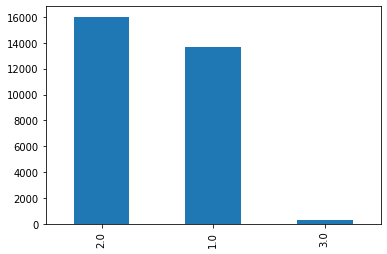

In [13]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

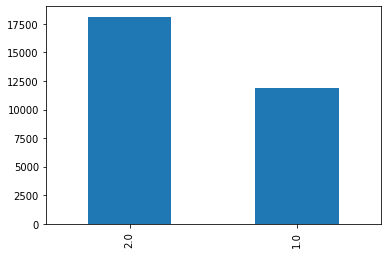

In [14]:
df.SEX.value_counts().plot(kind = 'bar')

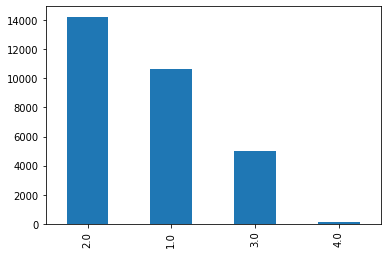

In [15]:
df.EDUCATION.value_counts().plot(kind = 'bar')

Nous pouvons voir que les étiquettes **3 et 4 de Mariage et d'éducation** qui représentent **« Autre »** sont moins présentes dans notre base de données ce qui nous donnera une idée du sur-ajustement (overfitting) s'il existe, alors le genre féminin est plus présent que le masculin